In [ ]:
pip install pandas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


<Axes: xlabel='Date'>

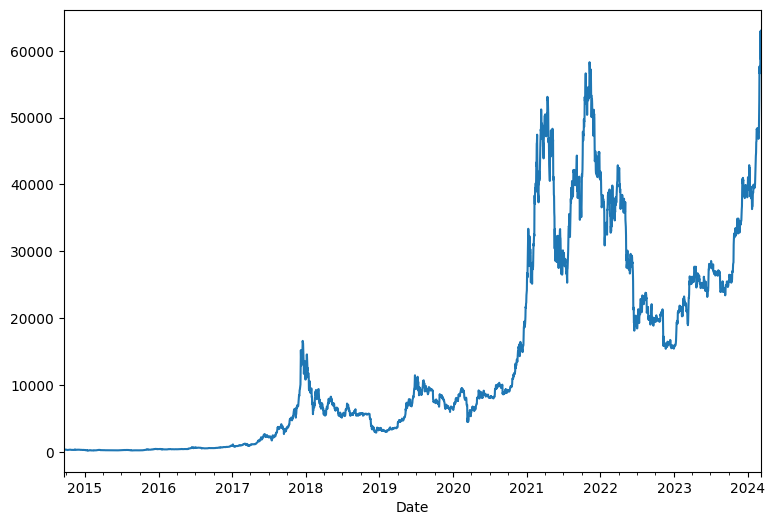

In [4]:
bitcoin['Close'].plot(figsize=(9, 6))

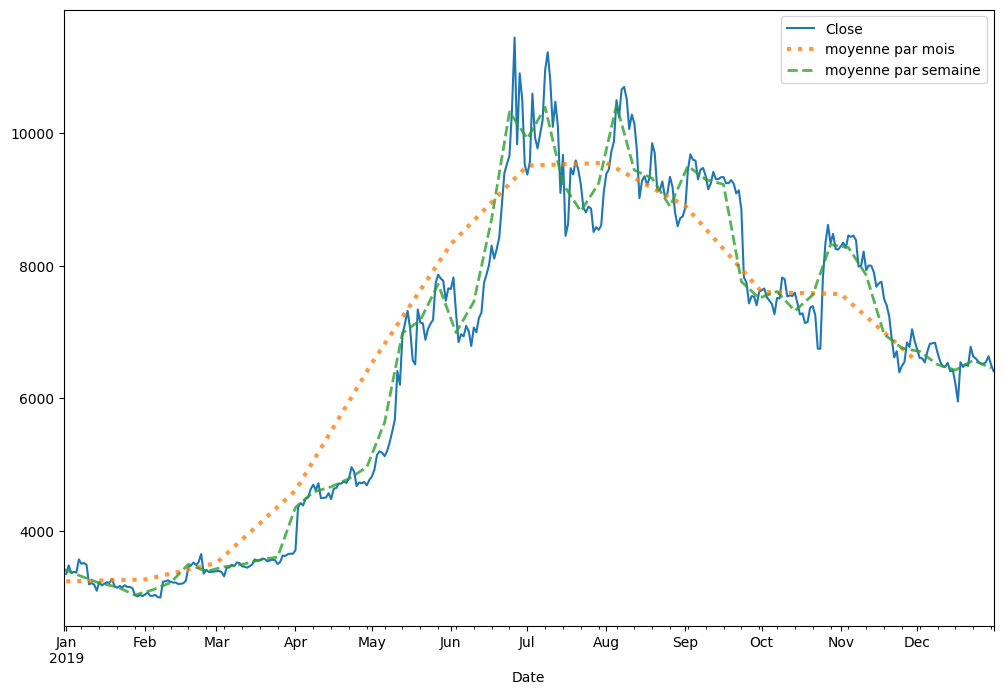

In [5]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('ME').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

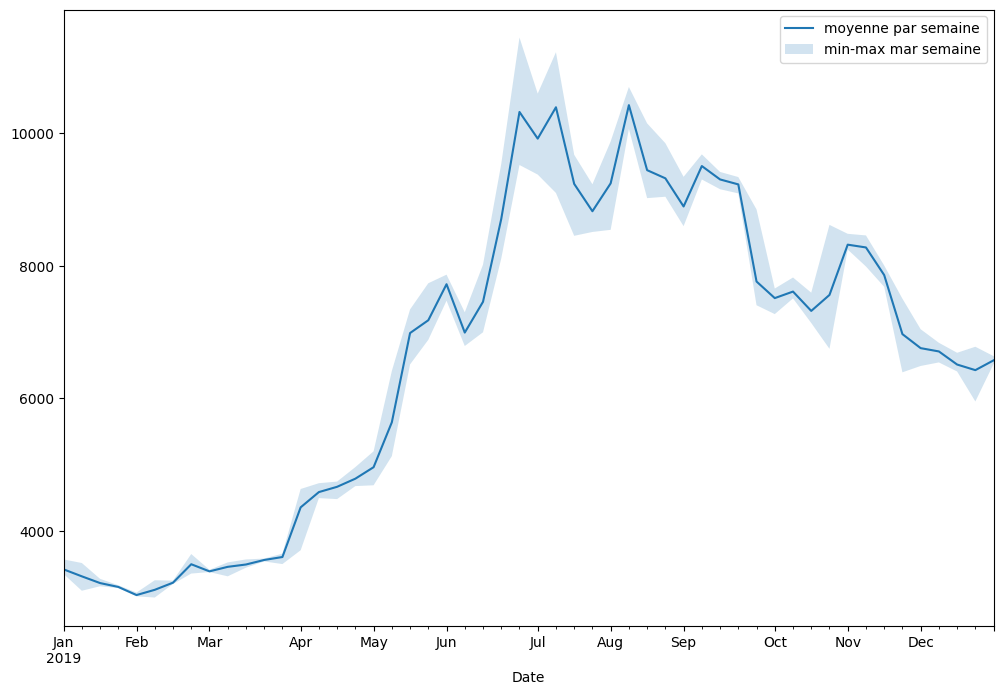

In [6]:
m = bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max'])
plt.figure(figsize=(12, 8))
m['mean']['2019'].plot(label="moyenne par semaine")
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label="min-max mar semaine")
plt.legend()
plt.show()

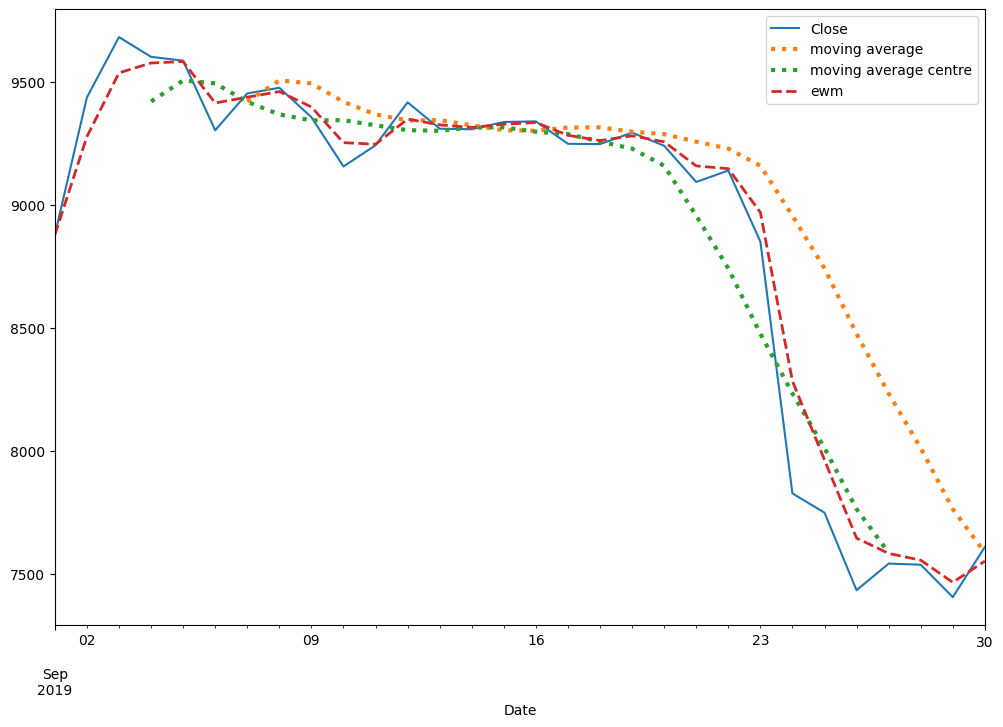

In [7]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(lw=3, ls=':', label='moving average')
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(lw=3, ls=':', label='moving average centre')
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(lw=2, ls='--', label='ewm')
plt.legend()
plt.show()

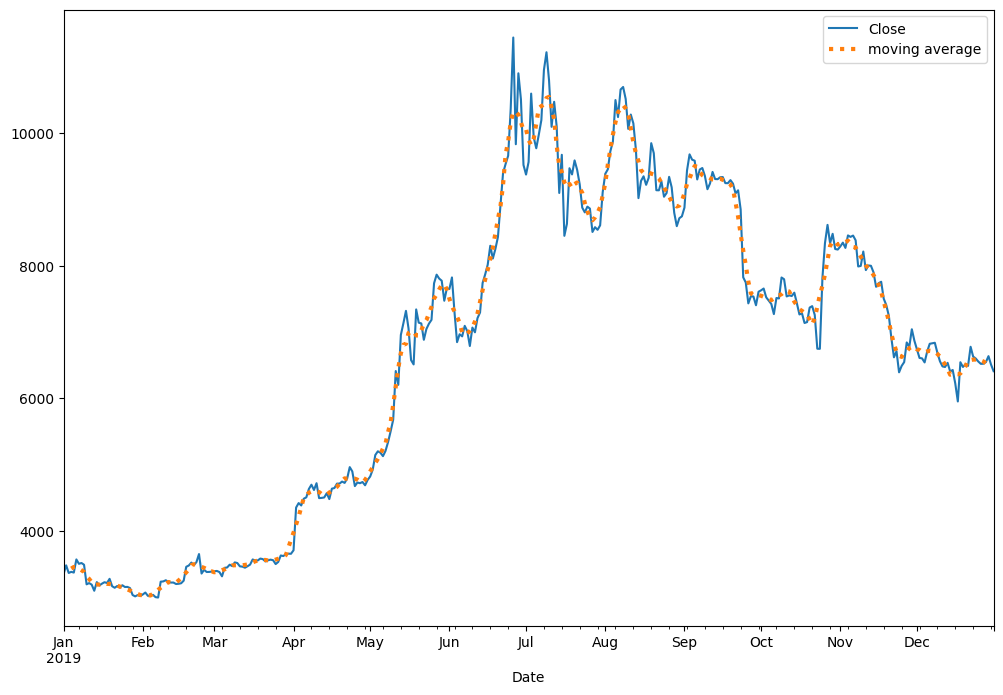

In [8]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].rolling(window=7, center=True).mean().plot(lw=3, ls=':', label='moving average')
plt.legend()
plt.show()

In [9]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

<Axes: xlabel='Date'>

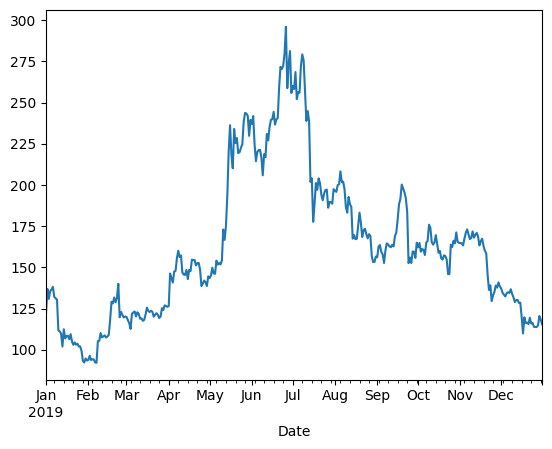

In [10]:
ethereum.loc['2019', 'Close'].plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

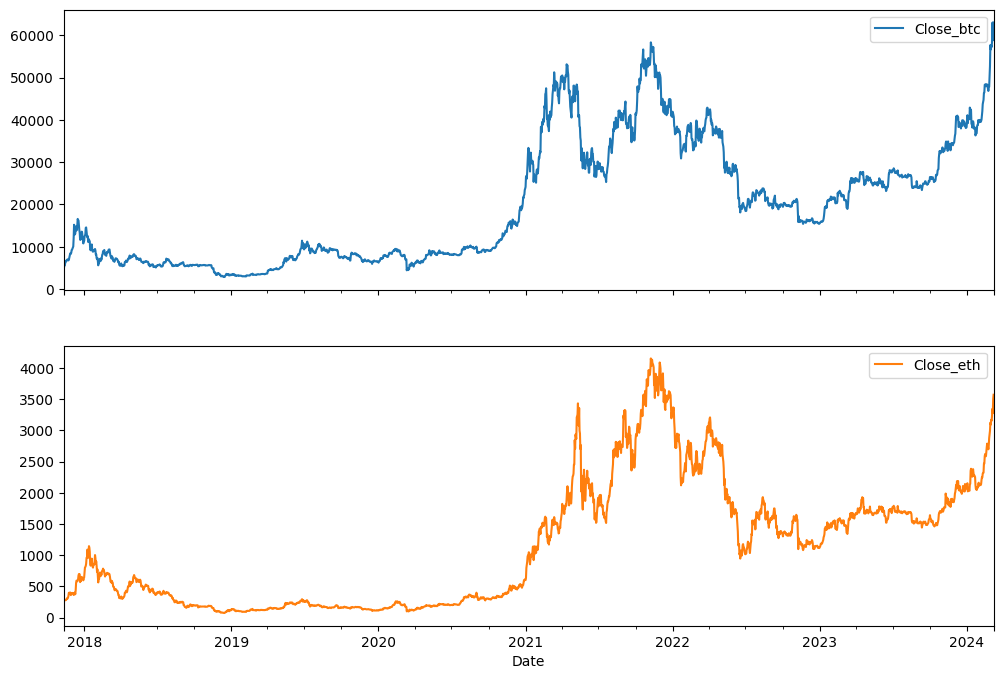

In [11]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))

In [12]:
btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.931545
Close_eth,0.931545,1.000000


<Axes: xlabel='Date'>

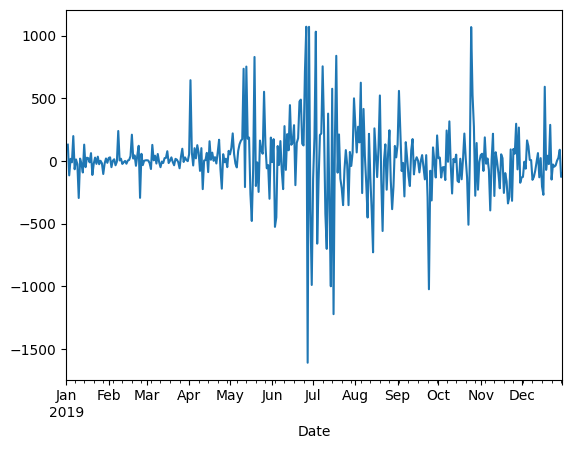

In [14]:
bitcoin['Close']['2019'].diff().plot()